<a href="https://colab.research.google.com/github/DJCordhose/deep-learning-crash-course-notebooks/blob/master/data/what-if.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What-If Tool on Insurance Data

Does not work with TensorFlow 2.0, yet

* Tool: https://pair-code.github.io/what-if-tool/
* Based on https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/tensorboard/plugins/interactive_inference/What_If_Tool_Notebook_Usage.ipynb 
* Install if not on Conda: https://github.com/tensorflow/tensorboard/tree/master/tensorboard/plugins/interactive_inference#how-do-i-enable-it-for-use-in-a-jupyter-notebook


In [1]:
try:
  import google.colab
  !pip install --upgrade -q witwidget
except Exception:
  pass

    100% |████████████████████████████████| 1.2MB 14.4MB/s 
    100% |████████████████████████████████| 337kB 24.0MB/s 
ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.9 which is incompatible.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [3]:
# a small sanity check, does tf seem to work ok?
hello = tf.constant('Hello TF!')
print("This works: {}".format(hello))

This works: Tensor("Const:0", shape=(), dtype=string)


In [4]:
# this should return True even on Colab
tf.test.is_gpu_available()

True

In [5]:
# read training dataset from CSV

import pandas as pd

train_csv_path = 'https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-10000.csv'
train_df = pd.read_csv(train_csv_path, sep=';')
train_df.head()

,speed,age,miles,group
0,126.0,54.0,41.0,2
1,149.0,40.0,52.0,0
2,135.0,66.0,57.0,2
3,139.0,45.0,27.0,1
4,111.0,44.0,25.0,1


In [6]:
train_df.describe()

,speed,age,miles,group
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,122.15240,45.082100,30.053500,0.999900
std,17.76672,17.065781,15.189836,0.816558
min,60.00000,16.000000,1.000000,0.000000
25%,108.00000,33.000000,18.000000,0.000000
50%,120.00000,42.000000,29.000000,1.000000
75%,137.00000,54.000000,42.000000,2.000000
max,184.00000,100.000000,87.000000,2.000000


In [0]:
y_train = train_df['group']
train_df.drop('group', axis='columns', inplace=True)
X_train = train_df.as_matrix()

In [8]:
test_csv_path = 'https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-500-test.csv'
test_df = pd.read_csv(test_csv_path, sep=';')

y_test = test_df['group']
test_df.drop('group', axis='columns', inplace=True)
X_test = test_df.as_matrix()

test_df.describe()

,speed,age,miles
count,500.000000,500.000000,500.000000
mean,122.220000,45.342000,29.852000
std,16.857995,16.724127,15.367186
min,87.000000,16.000000,1.000000
25%,109.000000,33.000000,18.000000
50%,120.000000,42.500000,29.000000
75%,135.000000,55.000000,41.000000
max,160.000000,96.000000,76.000000


In [9]:
y_test.describe()

count    500.000000
mean       0.996000
std        0.818121
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: group, dtype: float64

In [10]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

num_categories = 3
dropout = 0.5
model = tf.keras.Sequential()

model.add(Dense(500, name='hidden1', input_dim=3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(500, name='hidden2'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(num_categories, name='softmax', activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 500)               2000      
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 500)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activat

In [11]:
%%time 

BATCH_SIZE=2500
EPOCHS = 250

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                    validation_data=(X_test, y_test), 
                    verbose=0)

Instructions for updating:
Use tf.cast instead.
CPU times: user 17 s, sys: 3.04 s, total: 20 s
Wall time: 16.4 s


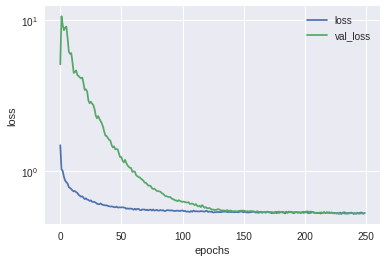

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['loss', 'val_loss'])

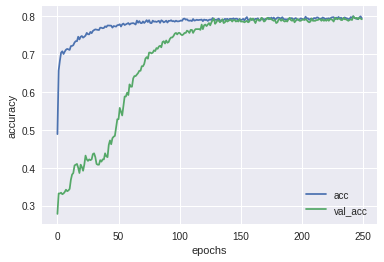

In [14]:
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.legend(['acc', 'val_acc'])

In [15]:
train_loss, train_accuracy = model.evaluate([X_train], y_train, batch_size=BATCH_SIZE)
train_loss, train_accuracy

10000/10000 [==============================] - 0s 2us/sample - loss: 0.4912 - acc: 0.8086


(0.49121034145355225, 0.8086)

In [16]:
test_loss, test_accuracy = model.evaluate([X_test], y_test, batch_size=BATCH_SIZE)
test_loss, test_accuracy

500/500 [==============================] - 0s 7us/sample - loss: 0.5247 - acc: 0.7920


(0.52471524477005, 0.792)

In [0]:
# convert test dataset to tf.Example protos needed for whatif

import numpy as np

# Converts a dataframe into a list of tf.Example protos.
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples

examples_df = pd.read_csv(test_csv_path, sep=';')
test_examples = df_to_examples(examples_df)

In [18]:
from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget

config_builder = WitConfigBuilder(test_examples)
WitWidget(config_builder)